# **TERRORIST ACTIVITY FORECASTING AND RISK ASSESSMENT SYSTEM**

## Mini Project 1A SEM-5 Respectively For The Academic Year 2023-24.
**1. Vedant Ramesh Bhosale   (07 / 211101051)**

**2. Ganesh Omprakash Karli  (32 / 211101023)**

**3. Shraddha Chagan Ratambe (54 / 211101011)**

**4. Yash Ashok Shirsath     (74 / 201101006)**

### Project Name - Terrorist Activity Forecasting & Risk Assessment System

### Project Objectives -

**1] Terrorist Activity Forecasting**:-

The primary goal of your project is to develop a system that can forecast future terrorist activities. This involves predicting where and when terrorist incidents are likely to occur.

**2] Risk Assessment**:-

In addition to forecasting, your system will assess the level of risk associated with potential terrorist events. This assessment may consider factors like the severity of the attack, the likelihood of occurrence, and the potential impact.

About Our Databases:-

This database reflects the collection and coding rules for the Global Terrorism Database. The GTD is an event-level database containing more than 200,000 records of terrorist attacks that have taken place around the world since 1970. It is maintained by the National Consortium for the Study of Terrorism and Responses to Terrorism (START) at the University of Maryland.

**GTD Collection, Maintenance & Improvements Have Been Supported by:-**

1] United States National Institute of Justice

2] United States Department of Homeland Security, Science and Technology Directorate

3] United States Department of State, Bureau of Counterterrorism and Countering Violent Extremism

4] United States Department of Defense, Combating Terrorism Technical Support Office

5] German Federal Foreign Office

6] United Kingdom Foreign, Commonwealth, and Development Office


### **1. DATA EXPLORATION**

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install openpyxl
import warnings
warnings.filterwarnings("ignore")
import folium

In [120]:
df = pd.read_csv("GTD RAND.csv", encoding="ISO-8859-1")

In [121]:
# Data Inspection
print("First 10 Rows of Dataset")
df.head(10)

First 10 Rows of Dataset


,Date,City,latitude,longitude,Country,Perpetrator,Weapon,Injuries,Fatalities,Description
0,09-02-1968,Buenos Aires,-34.6131500°,-34.6131500°,Argentina,Unknown,Firearms,0,0,ARGENTINA. The second floor of the U.S. embas...
1,12-02-1968,Santo Domingo,18.4861° N,69.9312° W,Dominican Republic,Unknown,Explosives,0,0,DOMINICAN REPUBLIC. A homemade bomb was found...
2,13-02-1968,Montevideo,-34.9011° S,-56.1645° W,Uruguay,Unknown,Fire or Firebomb,0,0,URUGUAY. A Molotov cocktail was thrown outsid...
3,20-02-1968,Santiago,-33.4489° S,-70.6693° W,Chile,Unknown,Explosives,0,0,CHILE. An explosion from a single stick of dy...
4,21-02-1968,"Washington, D.C.",38.9072° N,77.0369° W,United States,Unknown,Explosives,0,0,UNITED STATES. The Soviet embassy was bombed ...
5,21-02-1968,Neot Hakikar,31.2025° N,35.3858° E,Israel,Unknown,Unknown,0,0,ISRAEL. Palestinian terrorists damaged a pipe...
6,22-02-1968,Quito,0.1807° S,78.4678° W,Ecuador,Unknown,Explosives,0,0,ECUADOR. A bomb exploded in the Quito Binatio...
7,24-02-1968,Masada,31.3158° N,35.3533° E,Israel,Other,Explosives,0,0,ISRAEL. Palestinian terrorists fired five mor...
8,05-03-1968,Riohacha,11.5444° N,72.9069° W,Colombia,National Liberation Army of Colombia (ELN),Unknown,0,0,COLOMBIA. Three members of the Ejercito de Li...
9,08-03-1968,Rosario,-32.9442° S,-60.6505° W,Argentina,Frente de Liberacion Nacional del Vietnam del Sur,Firearms,0,0,ARGENTINA. The USIS office in Rosario was mac...


In [122]:
print("Last 10 Rows of Dataset")
df.tail(10)

Last 10 Rows of Dataset


,Date,City,latitude,longitude,Country,Perpetrator,Weapon,Injuries,Fatalities,Description
40119,15-12-2009,Ibague,NaN,NaN,Colombia,FARC,Explosives,1,2,"On December 15, 2009 a bomb exploded next to a..."
40120,16-12-2009,Milan,NaN,NaN,Italy,Informal Anarchist Federation,Explosives,0,0,"On December 16, 2009 a 2kg dynamite bomb parti..."
40121,17-12-2009,Narathiwat,NaN,NaN,Thailand,Unknown,Firearms,0,1,"On Dec, 17 2008 a policeman from the southern ..."
40122,18-12-2009,Iligan,NaN,NaN,Philippines,MILF,Remote-detonated explosive,0,0,"(Two of two attacks) On December 18, 2008, uni..."
40123,21-12-2009,Florence,NaN,NaN,Colombia,FARC,Explosives,2,1,"On December 21, 2009 FARC rebels kidnapped the..."
40124,25-12-2009,Detroit,NaN,NaN,United States,Al Qaeda,Explosives,1,0,"On December 25, 2009 Umar Farouk Abdulmutallab..."
40125,27-12-2009,Athens,NaN,NaN,Greece,Conspiracy of Fire Cells of Thessaloniki-Athens,Explosives,0,0,"On December 27, 2009 a bomb placed inside a ba..."
40126,28-12-2009,San Juan,NaN,NaN,Colombia,FARC,Fire or Firebomb,0,0,"On December 28, 2009 FARC rebels torched two b..."
40127,30-12-2009,Porto Vecchio,NaN,NaN,France,Unknown,Explosives,0,0,"On December 30, 2009 a bomb was planted outsid..."
40128,31-12-2009,Cloghoge,NaN,NaN,Northern Ireland,Unknown,Explosives,0,0,"On December 31, 2009 a 1000kg bomb was discove..."


In [123]:
# Data Summery
print("\nData summary statistics:")
df.describe()


Data summary statistics:


,Injuries,Fatalities
count,40129.000000,40129.000000
mean,3.647362,1.600738
std,42.589433,15.750102
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,5000.000000,2749.000000


In [124]:
# Missing Values Handling
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
Date               0
City            4974
latitude       27656
longitude      27656
Country            0
Perpetrator        4
Weapon             3
Injuries           0
Fatalities         0
Description        1
dtype: int64


In [125]:
# Checking Datatypes
data_types = df.dtypes
print("\nData types per column:")
print(data_types)


Data types per column:
Date           object
City           object
latitude       object
longitude      object
Country        object
Perpetrator    object
Weapon         object
Injuries        int64
Fatalities      int64
Description    object
dtype: object


In [126]:
df

,Date,City,latitude,longitude,Country,Perpetrator,Weapon,Injuries,Fatalities,Description
0,09-02-1968,Buenos Aires,-34.6131500°,-34.6131500°,Argentina,Unknown,Firearms,0,0,ARGENTINA. The second floor of the U.S. embas...
1,12-02-1968,Santo Domingo,18.4861° N,69.9312° W,Dominican Republic,Unknown,Explosives,0,0,DOMINICAN REPUBLIC. A homemade bomb was found...
2,13-02-1968,Montevideo,-34.9011° S,-56.1645° W,Uruguay,Unknown,Fire or Firebomb,0,0,URUGUAY. A Molotov cocktail was thrown outsid...
3,20-02-1968,Santiago,-33.4489° S,-70.6693° W,Chile,Unknown,Explosives,0,0,CHILE. An explosion from a single stick of dy...
4,21-02-1968,"Washington, D.C.",38.9072° N,77.0369° W,United States,Unknown,Explosives,0,0,UNITED STATES. The Soviet embassy was bombed ...
...,...,...,...,...,...,...,...,...,...,...
40124,25-12-2009,Detroit,NaN,NaN,United States,Al Qaeda,Explosives,1,0,"On December 25, 2009 Umar Farouk Abdulmutallab..."
40125,27-12-2009,Athens,NaN,NaN,Greece,Conspiracy of Fire Cells of Thessaloniki-Athens,Explosives,0,0,"On December 27, 2009 a bomb placed inside a ba..."
40126,28-12-2009,San Juan,NaN,NaN,Colombia,FARC,Fire or Firebomb,0,0,"On December 28, 2009 FARC rebels torched two b..."
40127,30-12-2009,Porto Vecchio,NaN,NaN,France,Unknown,Explosives,0,0,"On December 30, 2009 a bomb was planted outsid..."


In [127]:
df.shape

(40129, 10)

In [128]:
df.isnull().sum()

Date               0
City            4974
latitude       27656
longitude      27656
Country            0
Perpetrator        4
Weapon             3
Injuries           0
Fatalities         0
Description        1
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40129 entries, 0 to 40128
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         40129 non-null  object
 1   City         35155 non-null  object
 2   latitude     12473 non-null  object
 3   longitude    12473 non-null  object
 4   Country      40129 non-null  object
 5   Perpetrator  40125 non-null  object
 6   Weapon       40126 non-null  object
 7   Injuries     40129 non-null  int64 
 8   Fatalities   40129 non-null  int64 
 9   Description  40128 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.1+ MB


### **2. DATA PREPROCESSING**

In [130]:
# Date Column to Datetime Farmat
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [131]:
# Encoding Categorical Varibale
df = pd.get_dummies(df, columns=['City', 'Country', 'Perpetrator', 'Weapon'])


In [132]:
# Noarmalizing Numerical Features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Injuries', 'Fatalities']] = scaler.fit_transform(df[['Injuries', 'Fatalities']])

### **3. GEOSPATICAL ANALYSIS AND HOTSPOT IDENTIFICATION**

In [133]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from mpl_toolkits.axes_grid1 import make_axes_locatable
import re

In [134]:
# initalize geocoder
geolocator = Nominatim(user_agent="geoapi")

In [135]:
df.head()

,Date,latitude,longitude,Injuries,Fatalities,Description,City_,City_ West Tripura,City_Aalgaya,City_Aarwani,...,Weapon_Business,Weapon_Chemical Agent,Weapon_Explosives,Weapon_Fire or Firebomb,Weapon_Firearms,Weapon_Knives & sharp objects,Weapon_Other,Weapon_Remote-detonated explosive,Weapon_Telecommunication,Weapon_Unknown
0,1968-02-09,-34.6131500°,-34.6131500°,0.0,0.0,ARGENTINA. The second floor of the U.S. embas...,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1968-02-12,18.4861° N,69.9312° W,0.0,0.0,DOMINICAN REPUBLIC. A homemade bomb was found...,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1968-02-13,-34.9011° S,-56.1645° W,0.0,0.0,URUGUAY. A Molotov cocktail was thrown outsid...,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1968-02-20,-33.4489° S,-70.6693° W,0.0,0.0,CHILE. An explosion from a single stick of dy...,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1968-02-21,38.9072° N,77.0369° W,0.0,0.0,UNITED STATES. The Soviet embassy was bombed ...,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [136]:
# Clean and convert the "longitude" and "latitude" columns
def clean_and_convert_coordinates(coord):
    # Ensure the coordinate is a string
    coord = str(coord)

    # Extract numeric parts from the coordinate string
    parts = re.findall(r"[-+]?\d*\.\d+|\d+", coord)

    if len(parts) >= 1:
        value = float(parts[0])

        # Handle directional indicators (N, S, E, W)
        if 'S' in coord or 'W' in coord:
            value = -value

        return value
    else:
        return None  # Return None for invalid coordinates

In [137]:
# Update Function that clean and convert co-ordinates

df['Latitude'] = df['latitude'].map(clean_and_convert_coordinates)
df['Longitude'] = df['longitude'].map(clean_and_convert_coordinates)

In [138]:
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

In [139]:
#print(world.head())


In [140]:
#print(gdf.head())

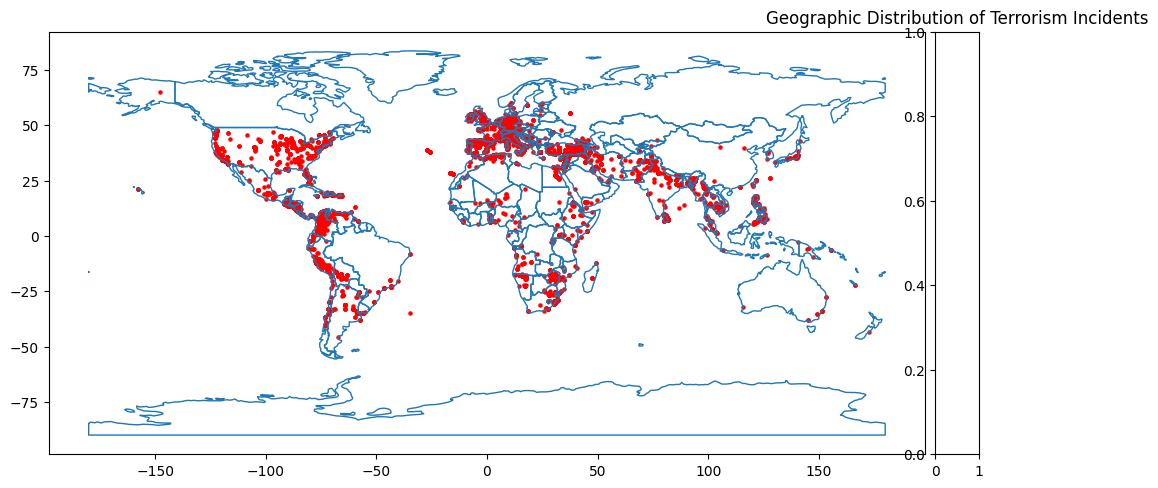

In [141]:
# Plot the data on a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, markersize=5, color='red', label='Terrorism Incidents', legend=True, cax=cax)

plt.title('Geographic Distribution of Terrorism Incidents')
plt.show()

## **4. SENTIMENT ANALYSIS**

In [142]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [143]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [144]:
from nltk import word_tokenize, pos_tag

def pos_tag_description(description):
    # Tokenize the description into words
    words = word_tokenize(description)
    # Perform POS tagging
    pos_tags = pos_tag(words)
    return pos_tags

In [145]:
# Filter out rows with non-string values in the 'Description' column
df = df[df['Description'].apply(lambda x: isinstance(x, str))]

# Apply the pos_tag_description function to the 'Description' column
df['POS Tags'] = df['Description'].apply(pos_tag_description)


In [146]:
print(df)

            Date      latitude     longitude  Injuries  Fatalities  \
0     1968-02-09  -34.6131500°  -34.6131500°    0.0000         0.0   
1     1968-02-12    18.4861° N    69.9312° W    0.0000         0.0   
2     1968-02-13   -34.9011° S   -56.1645° W    0.0000         0.0   
3     1968-02-20   -33.4489° S   -70.6693° W    0.0000         0.0   
4     1968-02-21    38.9072° N    77.0369° W    0.0000         0.0   
...          ...           ...           ...       ...         ...   
40124 2009-12-25           NaN           NaN    0.0002         0.0   
40125 2009-12-27           NaN           NaN    0.0000         0.0   
40126 2009-12-28           NaN           NaN    0.0000         0.0   
40127 2009-12-30           NaN           NaN    0.0000         0.0   
40128 2009-12-31           NaN           NaN    0.0000         0.0   

                                             Description  City_   \
0      ARGENTINA.  The second floor of the U.S. embas...       0   
1      DOMINICAN REPUBL

In [147]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer

# Function to perform lemmatization
def lemmatize_description(description):
    # Tokenize the description into words
    words = word_tokenize(description)
    # Perform POS tagging
    pos_tags = pos_tag(words)

    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize each word based on its POS tag
    lemmatized_words = []
    for word, pos in pos_tags:
        # Map POS tags to WordNet POS tags for lemmatization
        if pos.startswith('J'):
            # Adjective
            lemma = lemmatizer.lemmatize(word, pos='a')
        elif pos.startswith('V'):
            # Verb
            lemma = lemmatizer.lemmatize(word, pos='v')
        elif pos.startswith('N'):
            # Noun
            lemma = lemmatizer.lemmatize(word, pos='n')
        elif pos.startswith('R'):
            # Adverb
            lemma = lemmatizer.lemmatize(word, pos='r')
        else:
            # Default to noun lemmatization
            lemma = lemmatizer.lemmatize(word, pos='n')
        lemmatized_words.append(lemma)

            # Join the lemmatized words to form the lemmatized description
    lemmatized_description = ' '.join(lemmatized_words)

    return lemmatized_description

In [148]:
# Apply the lemmatize_description function to the 'Description' column
df['Lemmatized Description'] = df['Description'].apply(lemmatize_description)

# Print the DataFrame with the lemmatized descriptions
print(df[['Description', 'Lemmatized Description']])

                                             Description  \
0      ARGENTINA.  The second floor of the U.S. embas...   
1      DOMINICAN REPUBLIC.  A homemade bomb was found...   
2      URUGUAY.  A Molotov cocktail was thrown outsid...   
3      CHILE.  An explosion from a single stick of dy...   
4      UNITED STATES.  The Soviet embassy was bombed ...   
...                                                  ...   
40124  On December 25, 2009 Umar Farouk Abdulmutallab...   
40125  On December 27, 2009 a bomb placed inside a ba...   
40126  On December 28, 2009 FARC rebels torched two b...   
40127  On December 30, 2009 a bomb was planted outsid...   
40128  On December 31, 2009 a 1000kg bomb was discove...   

                                  Lemmatized Description  
0      ARGENTINA . The second floor of the U.S. embas...  
1      DOMINICAN REPUBLIC . A homemade bomb be find b...  
2      URUGUAY . A Molotov cocktail be throw outside ...  
3      CHILE . An explosion from a single s

In [149]:
! pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [150]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using VADER
def analyze_sentiment(description):
    sentiment = analyzer.polarity_scores(description)
    # Extract the compound sentiment score
    compound_score = sentiment['compound']

    # Determine sentiment based on the compound score
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [151]:
# Apply the analyze_sentiment function to the 'Lemmatized Description' column
df['Sentiment'] = df['Lemmatized Description'].apply(analyze_sentiment)

# Print the DataFrame with sentiment analysis results
print(df[['Lemmatized Description', 'Sentiment']])

                                  Lemmatized Description Sentiment
0      ARGENTINA . The second floor of the U.S. embas...  Negative
1      DOMINICAN REPUBLIC . A homemade bomb be find b...  Negative
2      URUGUAY . A Molotov cocktail be throw outside ...  Negative
3      CHILE . An explosion from a single stick of dy...  Negative
4      UNITED STATES . The Soviet embassy be bomb in ...  Negative
...                                                  ...       ...
40124  On December 25 , 2009 Umar Farouk Abdulmutalla...  Negative
40125  On December 27 , 2009 a bomb place inside a ba...  Negative
40126  On December 28 , 2009 FARC rebel torch two bus...  Negative
40127  On December 30 , 2009 a bomb be plant outside ...  Positive
40128  On December 31 , 2009 a 1000kg bomb be discove...  Negative

[40128 rows x 2 columns]


In [152]:
# Count the occurrences of each sentiment label
sentiment_counts = df['Sentiment'].value_counts()

# Print the sentiment counts
print(sentiment_counts)


Negative    34698
Positive     3608
Neutral      1822
Name: Sentiment, dtype: int64


## **5. DATA VISUALIZATION**

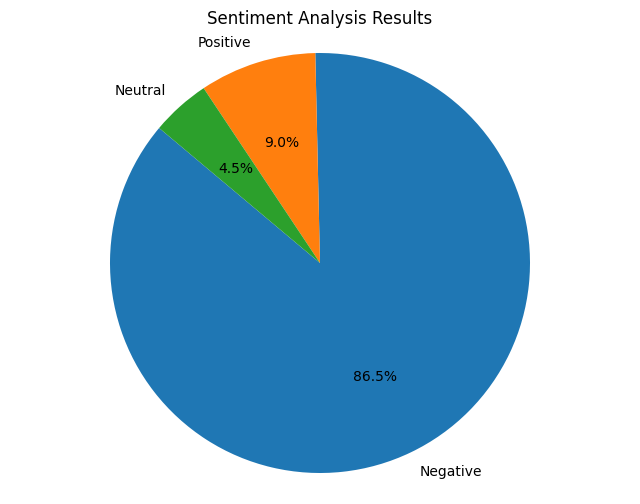

In [153]:
# Count the occurrences of each sentiment label
sentiment_counts = df['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis Results')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [154]:
from wordcloud import WordCloud

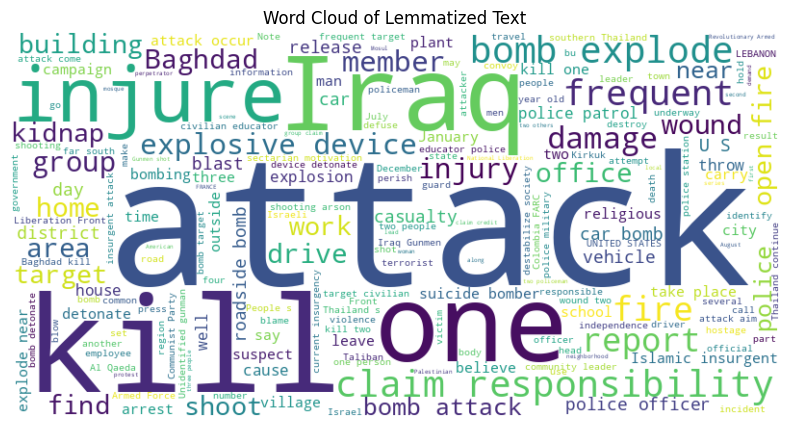

In [155]:
# Combine all text in the 'Lemmatized Description' column into a single string
text = ' '.join(df['Lemmatized Description'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Text')
plt.show()

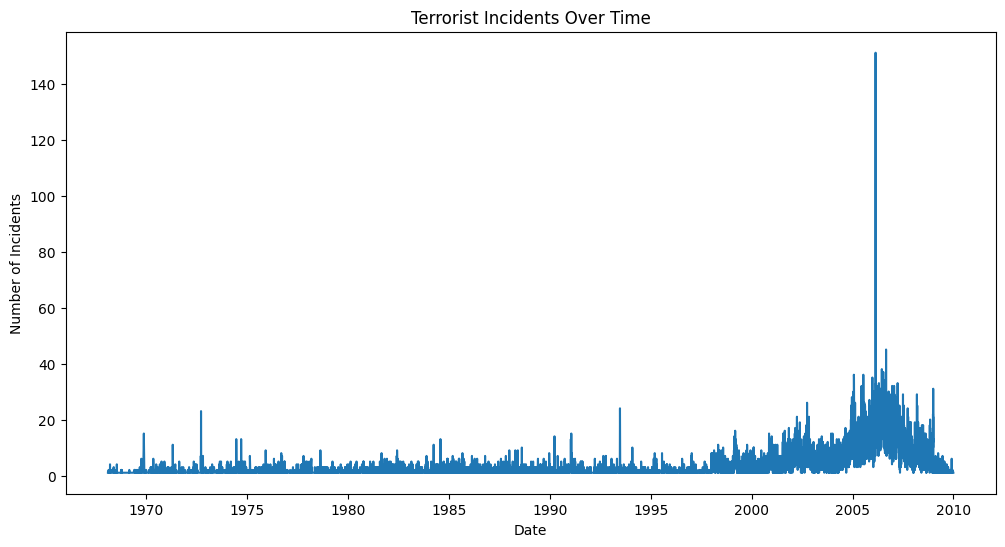

In [156]:
# TIME SERIES ANALYSIS

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group incidents by date and count the number of incidents for each date
incidents_by_date = df.groupby('Date').size()

# Create a time series chart
plt.figure(figsize=(12, 6))
plt.plot(incidents_by_date.index, incidents_by_date.values)
plt.title('Terrorist Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()

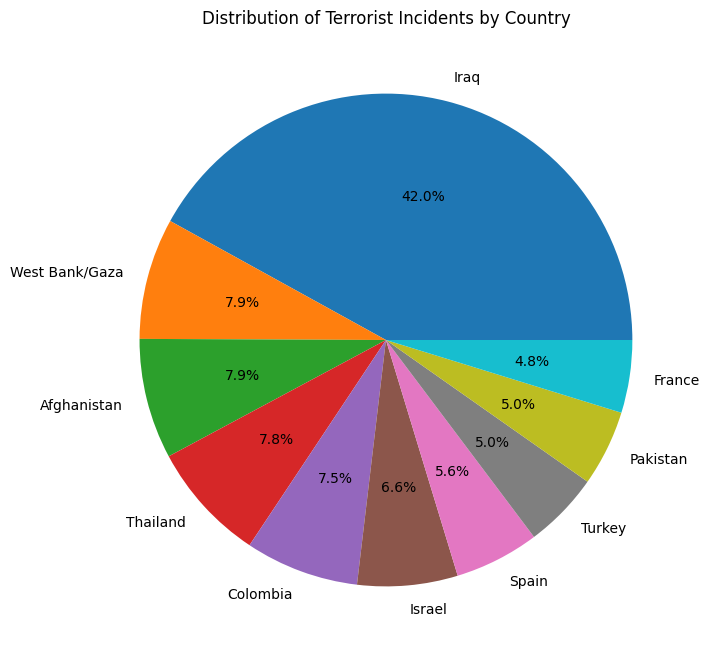

In [167]:
# Group incidents by country and count occurrences
country_counts = df['Country'].value_counts().head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Terrorist Incidents by Country')
plt.show()


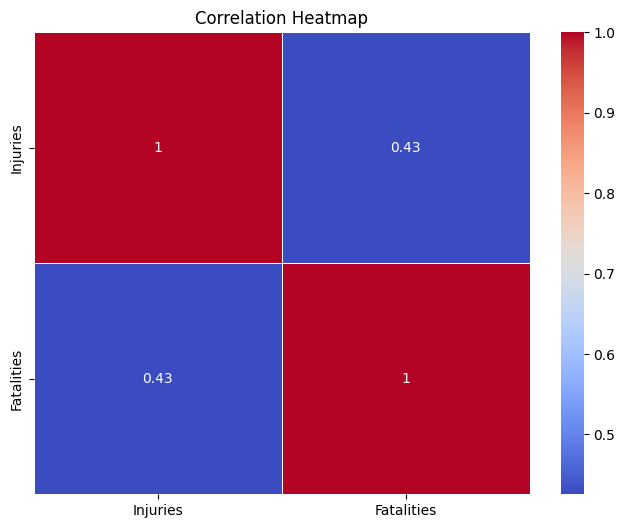

In [168]:
# Assuming you have additional columns for injuries, fatalities, and weapon types
correlation_matrix = df[['Injuries', 'Fatalities']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
